In [ ]:
# RNN

import numpy
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [ ]:
dataset = pd.read_csv('covid1.csv')

In [ ]:
dataset.head()

,Date,Confirmed_cases
0,"24 January, 2020",0
1,"25 January, 2020",3
2,"26 January, 2020",4
3,"27 January, 2020",4
4,"28 January, 2020",4


In [ ]:
dataset.shape

(186, 2)

In [ ]:
covid1 = dataset['Confirmed_cases']
covid1.index = dataset['Date']

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A1B766ECC8>],
      dtype=object)

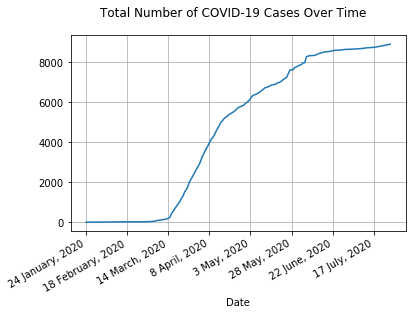

In [ ]:
covid1.plot(subplots=True, grid= True, title="Total Number of COVID-19 Cases Over Time")

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset

In [ ]:
dataframe = read_csv('covid1.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [ ]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [ ]:
# split into train and test sets
train_size = int(len(dataset) * 0.70)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

130 56


In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

Train on 115 samples, validate on 13 samples
Epoch 1/200
 - 1s - loss: 0.0229 - mean_squared_error: 0.0229 - val_loss: 0.0036 - val_mean_squared_error: 0.0036
Epoch 2/200
 - 0s - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 3/200
 - 0s - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 4.2080e-04 - val_mean_squared_error: 4.2080e-04
Epoch 4/200
 - 0s - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 6.0055e-04 - val_mean_squared_error: 6.0055e-04
Epoch 5/200
 - 0s - loss: 5.6448e-04 - mean_squared_error: 5.6448e-04 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 6/200
 - 0s - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 7/200
 - 0s - loss: 4.2086e-04 - mean_squared_error: 4.2086e-04 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 8/200
 - 0s - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 9/200

 - 0s - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 71/200
 - 0s - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0058 - val_mean_squared_error: 0.0058
Epoch 72/200
 - 0s - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0055 - val_mean_squared_error: 0.0055
Epoch 73/200
 - 0s - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 74/200
 - 0s - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0052 - val_mean_squared_error: 0.0052
Epoch 75/200
 - 0s - loss: 0.0127 - mean_squared_error: 0.0127 - val_loss: 0.0038 - val_mean_squared_error: 0.0038
Epoch 76/200
 - 0s - loss: 8.7035e-04 - mean_squared_error: 8.7035e-04 - val_loss: 0.0055 - val_mean_squared_error: 0.0055
Epoch 77/200
 - 0s - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 7.8669e-04 - val_mean_squared_error: 7.8669e-04
Epoch 78/200
 - 0s - loss: 2.5964e-04 - mean_squared_error: 2.5964e-04 - val_

Epoch 140/200
 - 0s - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.0034 - val_mean_squared_error: 0.0034
Epoch 141/200
 - 0s - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0048 - val_mean_squared_error: 0.0048
Epoch 142/200
 - 0s - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.0063 - val_mean_squared_error: 0.0063
Epoch 143/200
 - 0s - loss: 5.8010e-04 - mean_squared_error: 5.8010e-04 - val_loss: 0.0044 - val_mean_squared_error: 0.0044
Epoch 144/200
 - 0s - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0082 - val_mean_squared_error: 0.0082
Epoch 145/200
 - 0s - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0044 - val_mean_squared_error: 0.0044
Epoch 146/200
 - 0s - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.0048 - val_mean_squared_error: 0.0048
Epoch 147/200
 - 0s - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0056 - val_mean_squared_error: 0.0056
Epoch 148/200
 - 0s - loss: 0.0053 - mean_squared_error: 0.0053 

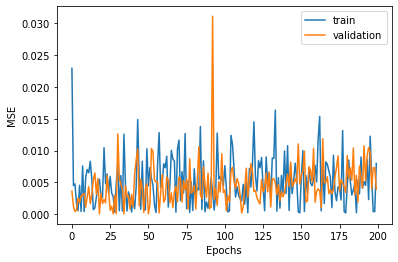

In [ ]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

model = Sequential()

model.add(SimpleRNN(32, dropout=0.03, recurrent_dropout=0.03, return_sequences=True, input_shape=(1, look_back), name ="layer1"))
model.add(SimpleRNN(64, dropout=0.08, recurrent_dropout=0.07, activation='relu', name ="layer2"))

model.add(Dense(1, activation = 'relu'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics =['mean_squared_error']) #RMSProp
history = model.fit(trainX, trainY, validation_split=0.1, epochs=200, batch_size=1, verbose=2)

fig, ax = plt.subplots()

plt.plot(history.history['mean_squared_error'], label='train')
plt.plot(history.history['val_mean_squared_error'], label='validation')

plt.xlabel(xlabel ="Epochs")
plt.ylabel(ylabel ="MSE")

ax.legend()

plt.show()

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 309.44 RMSE
Test Score: 657.49 RMSE


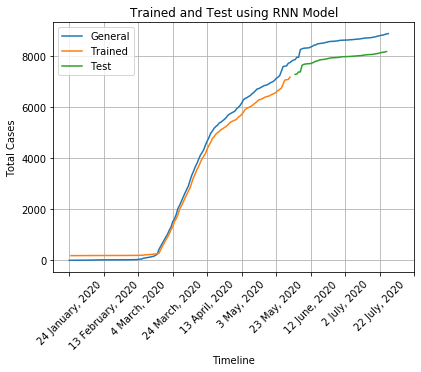

In [ ]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions

fig, ax = plt.subplots()

plt.plot(scaler.inverse_transform(dataset), label='General')
plt.plot(covid1.index, trainPredictPlot, label='Trained')
plt.plot(testPredictPlot, label='Test')

plt.tight_layout()
plt.xticks(rotation=45)
ax.set_xticks([0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200])

plt.xlabel(xlabel ="Timeline")
plt.ylabel(ylabel ="Total Cases")
plt.title("Trained and Test using RNN Model")

ax.legend()
plt.grid()
plt.show()

In [ ]:
mse_result = history.history['mean_squared_error']

In [ ]:
for number, result in enumerate(mse_result):
    print(number, result)

0 0.022939386
1 0.004477657
2 0.0047644884
3 0.0017243903
4 0.0005644812
5 0.004545161
6 0.0004208623
7 0.007576714
8 0.000413653
9 0.0057651503
10 0.0070274547
11 0.006518735
12 0.0083105
13 0.00556817
14 0.00070157385
15 0.000986988
16 0.0027043254
17 0.0043858234
18 0.0055102883
19 0.0028319638
20 0.0025658077
21 0.01045658
22 0.004766165
23 0.006327682
24 0.003262529
25 0.0059464904
26 0.0033144935
27 0.0027330958
28 0.00029986477
29 0.0048626876
30 0.007913635
31 0.00052012206
32 0.006068909
33 0.0005015085
34 0.012565293
35 0.0046163714
36 0.0005022918
37 0.0035117439
38 0.0023854382
39 0.00034259752
40 0.0025015022
41 0.0008585082
42 0.0042534415
43 0.014871029
44 0.005668331
45 0.0007712569
46 0.008326239
47 0.00067925785
48 0.0006739086
49 0.010283687
50 0.0044325157
51 0.0073327534
52 0.0056854314
53 0.0045368755
54 0.0013881031
55 0.0002605837
56 0.0077005504
57 0.012823885
58 0.0041904105
59 0.0047703786
60 0.007919019
61 0.007294845
62 0.0091131525
63 0.0011091927
64 0.004

In [ ]:
val_mse_result = history.history['val_mean_squared_error']

In [ ]:
for number, result in enumerate(val_mse_result):
    print(number, result)

0 0.0036189300008118153
1 0.0011932519264519215
2 0.0004208023310638964
3 0.0006005507311783731
4 0.00253629544749856
5 0.0018195291049778461
6 0.0028699920512735844
7 0.00301219429820776
8 0.0032721352763473988
9 0.001101948437280953
10 0.0027325188275426626
11 0.004331197123974562
12 0.001656092470511794
13 0.003047697013244033
14 0.005367472302168608
15 0.006495309062302113
16 0.003154219826683402
17 0.005610126536339521
18 4.678819459513761e-05
19 0.0032672560773789883
20 0.0016807944048196077
21 0.002315995516255498
22 0.001770819304510951
23 0.006090780720114708
24 0.003587137907743454
25 0.0006059050792828202
26 0.001257259980775416
27 5.297665484249592e-05
28 0.002995041897520423
29 7.412589911837131e-05
30 0.012608632445335388
31 0.005551694892346859
32 0.004833520390093327
33 0.0037856583949178457
34 5.254094867268577e-05
35 0.004459272138774395
36 0.0027940128929913044
37 0.00292315986007452
38 0.0007934432942420244
39 0.0031249364838004112
40 0.0011387367267161608
41 0.0063

In [ ]:
""" This codes were adapted and inspired by https://machinelearningmastery.com/ """

' This codes were adapted and inspired by https://machinelearningmastery.com/ '